# Presenting strong scaling data

In this notebook, we generate and display scaling data for two hypothetical codes: one which achieves perfect scaling and another that has realistic/imperfect scaling. The main takeaway is that naively plotting run time vs. core count using linear axes is to be avoided since it does not provide accurate insight into performance, particularly at higher core counts.

Note that you can use this notebook to create scaling plots that should be ready to use in requests for compute time through ACCESS and other organizations.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.get_backend()

import matplotlib.pyplot as plt
import numpy as np

### Define functions for plotting on linear and log axes

In [2]:
def scaling_plot_linear(cores, time, title, figname):
    """Plot scaling data on linear axes.

    Keyword arguments:
    cores -- core count; can also be GPUs, nodes or other units
    time -- run times corresponding to core counts
    title -- title listed in plot
    figname -- name of figure saved to disk
    """
    
    f, ax = plt.subplots()
    
    ax.set_xlabel('Cores', fontsize=14)
    ax.set_ylabel('t', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.plot(cores, time, 'ro-')
    
    plt.savefig(figname, dpi=300)
    plt.show()
    return(None)

In [3]:
def scaling_plot_log(cores, core_units, time, time_units, title, figname):
    """Plot scaling data on log axes.

    Keyword arguments:
    cores -- core count / number of processing units
    core_units -- type of processing units (CPUs, GPUs, etc.)
    time -- run times corresponding to core counts
    time_units -- units for run times (s, m, hours, etc.)
    title -- title listed in plot
    figname -- name of figure saved to disk
    """
    
    f, ax = plt.subplots()

    # Calculate speedup and parallel efficiency
    speedup = time[0] / time
    efficiency = speedup / cores

    # Plot scaling data on log axes
    time_label = 't(' + time_units + ')'
    ax.set_xlabel(core_units, fontsize=14)
    ax.set_ylabel(time_label, fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(cores, time, 'ro-', label=time_label)
    
    # Add line indicating perfect scaling
    x1 = cores[1]
    x2 = cores[3]
    y1 = time[1] * 0.5
    y2 = y1 * (x1/x2)
    x = [x1, x2]
    y = [y1, y2]
    ax.plot(x, y, 'k', label='linear')

    # Plot parallel efficiency on right axis
    ax2 = ax.twinx()
    ax2.set_ylabel('parallel efficiency', fontsize=14)
    ax2.set_ylim(0, 1.05)
    ax2.plot(cores, efficiency, 'bx-', label='efficiency')

    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(0.05, 0.1, 0.1, 0.1), frameon=False)
    ax2.legend(loc='upper left', bbox_to_anchor=(0.05, 0.15, 0.1, 0.1), frameon=False)

    plt.savefig(figname, dpi=300)
    plt.show()
    return(None)

### Define data sets illustrating perfect/imperfect scaling

In [4]:
perfect_strong_cores = np.array([1, 2, 4, 8, 16, 32, 64, 128])
perfect_strong_time = 10000.0 / perfect_strong_cores

imperfect_strong_cores = np.array([1, 2, 4, 8, 16, 32, 64, 128])
imperfect_strong_time = 10000.0 * np.array([ 1.0, 1.05, 1.05, 1.07, 1.2, 1.5, 2.3, 4.0]) / imperfect_strong_cores

### Plot timings on linear axes - the wrong way 

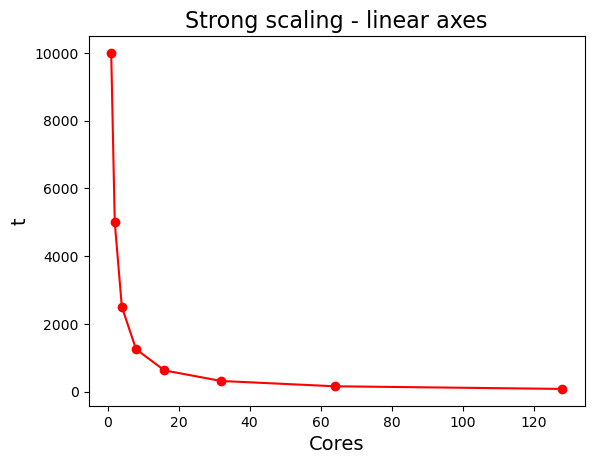

In [5]:
# Code with perfect scaling
scaling_plot_linear(perfect_strong_cores, perfect_strong_time, 
               'Strong scaling - linear axes', "strong1_lin.png")

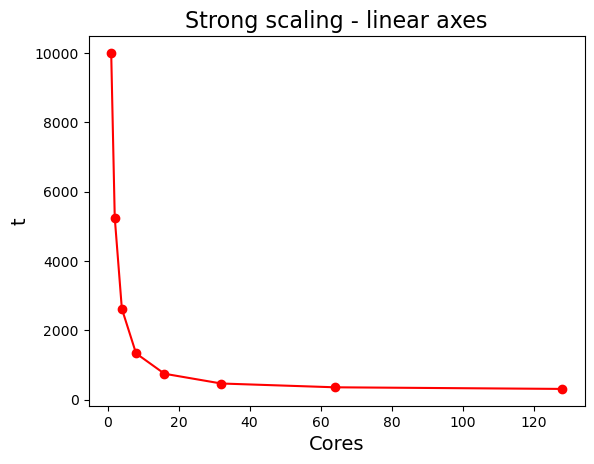

In [6]:
# Code with imperfect scaling
scaling_plot_linear(imperfect_strong_cores, imperfect_strong_time, 
               'Strong scaling - linear axes', "strong2_lin.png")

### Plot timings on log axes - the right way

Before we plot the scaling data the right way, let's add a few additional features to our figure.

* Plot parallel efficiency on the right axis
* Include a line showing perfect linear scaling
* Allow user to enter units for the processing units (CPUs, GPUs, etc.)
* Allow user to enter units for run times (s, m, hours, etc.)

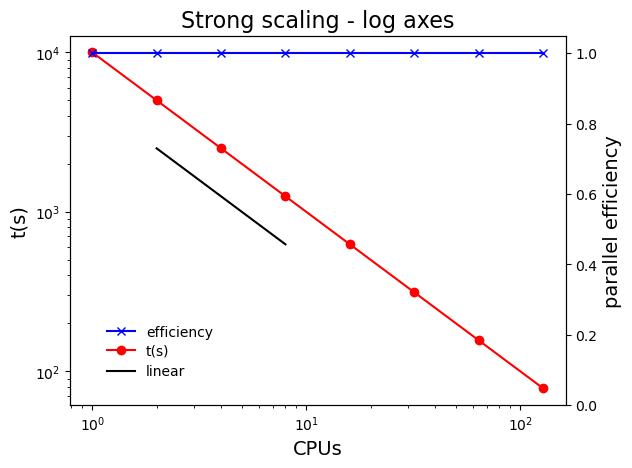

In [11]:
# Code with perfect scaling
scaling_plot_log(perfect_strong_cores, 'CPUs', perfect_strong_time, 's', 
               'Strong scaling - log axes', "strong1_log.png")

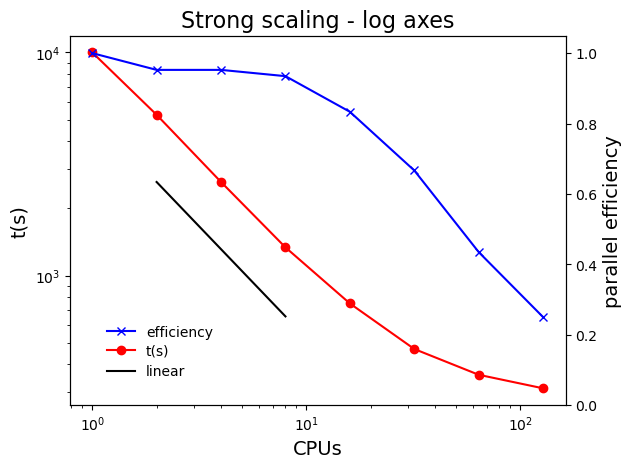

In [12]:
# Code with imperfect scaling
scaling_plot_log(imperfect_strong_cores, 'CPUs', imperfect_strong_time, 's',
               'Strong scaling - log axes', "strong2_log.png")

### Generate scaling plot for your application

In [17]:
# Enter scaling data, units, title and figure name below
cores = np.array([1, 2, 4, 8, 16, 32, 64])
time = np.array([1000.0, 500.0, 260.0, 140.0, 77.0, 52.0, 45.0])
core_units = 'CPU cores'
time_units = 's'
title = "Application scaling"
figure_name = "app-scaling.png"

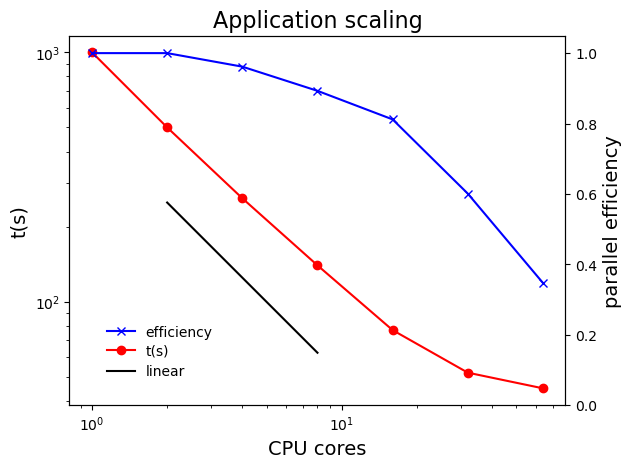

In [18]:
scaling_plot_log(cores, core_units, time, time_units, title, figure_name)